# Logistic Regression - Predict Brease Cancer


# CASE: 


<p>Breast cancer (BC) stands as one of the most prevalent cancers affecting women globally. It accounts for a significant majority of new cancer cases and cancer-related fatalities based on worldwide statistics, rendering it a substantial public health concern in contemporary society.</p>

<p>The timely detection of BC holds the potential to notably enhance prognosis and survival rates. By facilitating prompt clinical intervention for patients, early diagnosis plays a pivotal role. Additionally, the accurate differentiation of benign tumors can avert unnecessary treatments for patients. Consequently, achieving accurate BC diagnoses and proficient patient categorization into malignant or benign groups remains an area of extensive investigation. Given its distinct capacity for discerning critical features from intricate BC datasets, machine learning (ML) has gained widespread recognition as the preferred approach for BC pattern classification and predictive modeling.</p>
<p>
Classification and data mining methods prove to be effective tools for data categorization. This is particularly evident in the medical realm, where these techniques find extensive application in diagnosis and analysis, contributing to informed decision-making processes. </p>

<p>This case a curated breast cancer dataset to demonstrate the use of two predictive analytics tools: Python and KNIME. </p>

**Data**: 
- Data Source: Breast Cancer Dataset
- URL: http://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic
- Attributes: The dataset has 32 features (attributes). However, ten of them that are numerical are often used in modeling. 
    - 1) ID number 
    - 2) Diagnosis (M = malignant, B = benign) 
    - 3-32) 

- Ten real-valued features are computed for each cell nucleus: 
    - radius (mean of distances from center to points on the perimeter) 
    - texture (standard deviation of gray-scale values) 
    - perimeter 
    - area 
    - smoothness (local variation in radius lengths) 
    - compactness (perimeter^2 / area - 1.0) 
    - concavity (severity of concave portions of the contour) 
    - concave points (number of concave portions of the contour) 
    - symmetry 
    - fractal dimension ("coastline approximation" - 1)

## Problem Understanding
* What factors contribute to breast cancer?
* What does a predictive model look like? 

In [4]:
# --- Import Libraries ---
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Put the data in to a DataFrame

In [6]:
# -- Load the dataset
cancer = pd.read_csv("https://raw.githubusercontent.com/ttchuang/dataset/master/breast_cancer.csv")

In [7]:
# -- properties of data --
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
cols = ['radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'diagnosis']
cancer_df = cancer.loc[:,cols]
cancer_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,M


In [9]:
# -- add labels of diagonsis to the dataframe --
# -- M: Malignant --
# -- B: Benign --
cancer_df['outcome'] = cancer_df['diagnosis'].apply(lambda x: 'Benign' if(x=='B') else 'Malignant')

In [10]:
# -- Dataframe shape --
cancer_df.shape

(569, 12)

In [11]:
cancer_df.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'diagnosis', 'outcome'],
      dtype='object')

In [12]:
cancer_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,M,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,M,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,M,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,M,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,M,Malignant


In [13]:
cancer_df['diagnosis']=cancer_df['diagnosis'].apply(lambda x: 1 if x=="M" else 0)
cancer_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,1,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,1,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,1,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,1,Malignant


In [14]:
# -- Preview the data --

cancer_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,1,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,1,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,1,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,1,Malignant


### Examine relationships between features

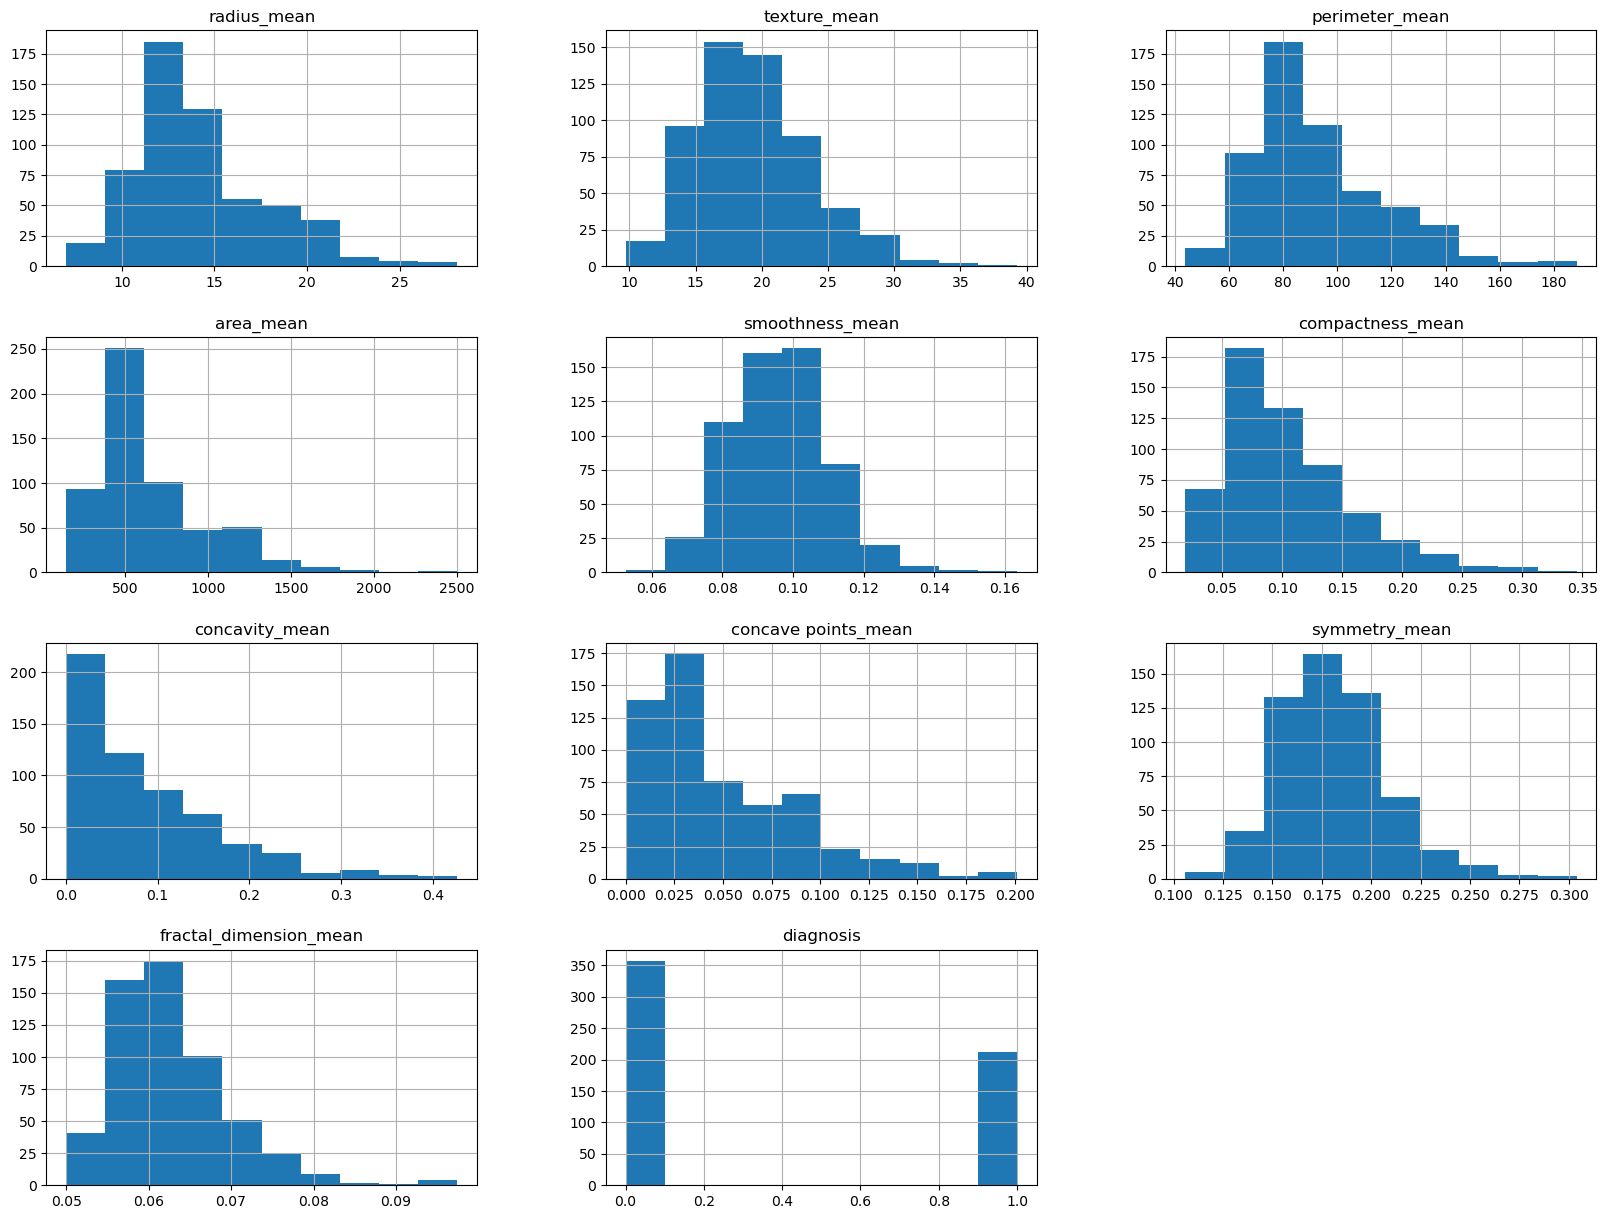

In [16]:
# -- Examine the distributin of variables --
cancer_df.iloc[:,:-1].hist(bins=10,figsize=(20,15))
plt.show()

In [17]:
# -- find correlations between features --
# cancer_df.iloc[:,:-1].corr().style.background_gradient("Greens")
cancer_df.iloc[:,:-1].corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.730029
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.415185
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.742636
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.708984
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.358560
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.596534
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.696360
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.776614
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.330499
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,-0.012838


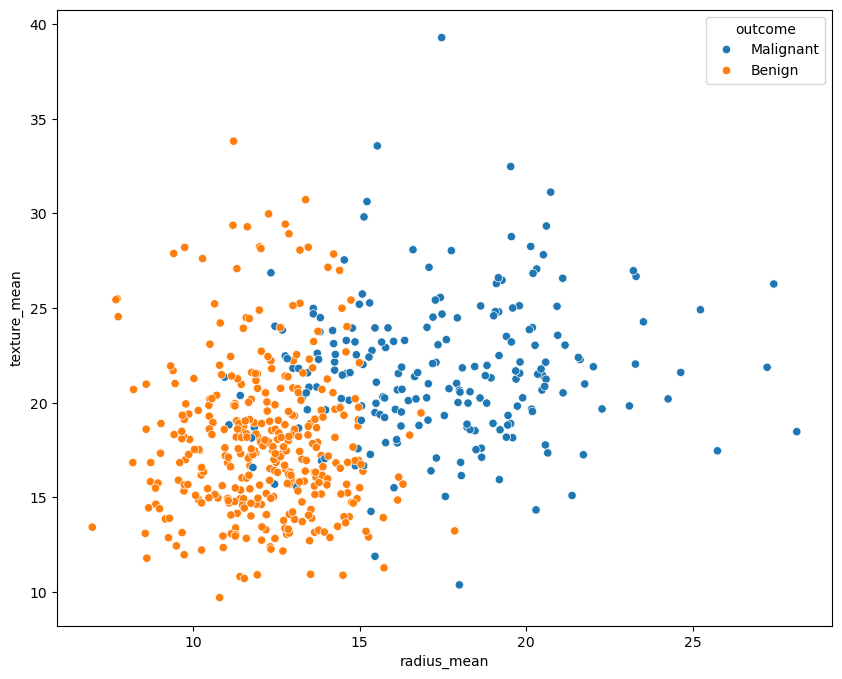

In [18]:
# -- Use DataFrame and Seaborn --

%matplotlib inline

plt.figure(figsize=(10,8)) # -- Here figsize(,) is a function to determine the size (inch) of the figure (canvas) 
sns.scatterplot(x=cancer_df['radius_mean'],
                y=cancer_df['texture_mean'],
                hue=cancer_df['outcome']);
# -- the parameter, hue, in seaborn works like a legend --

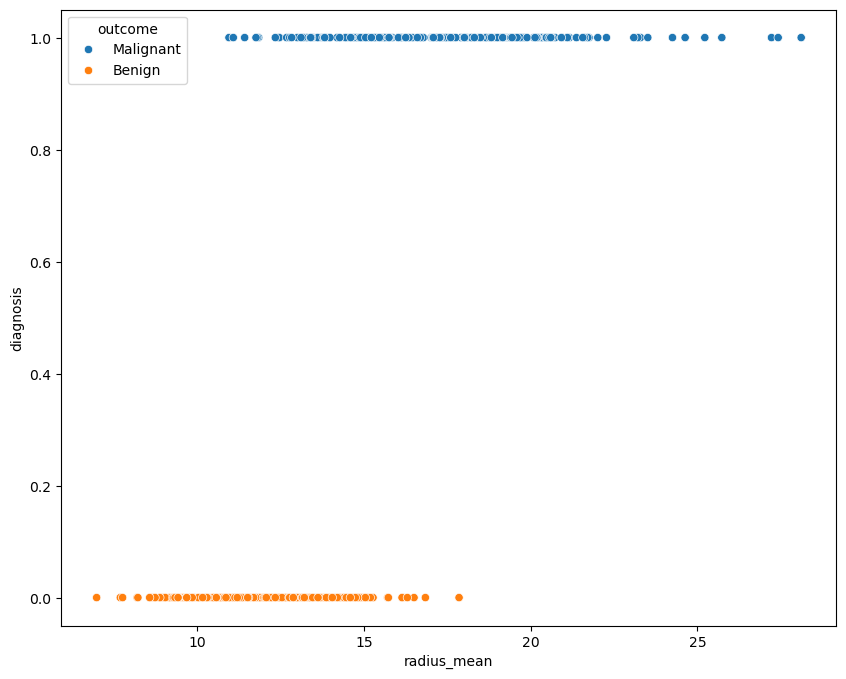

In [19]:
# -- Use DataFrame and Seaborn --
# -- See how target is related to MEAN RADIUS --
%matplotlib inline

plt.figure(figsize=(10,8))
sns.scatterplot(x=cancer_df['radius_mean'],
                y=cancer_df['diagnosis'],
                hue=cancer_df['outcome']);


## Modeling
### Train with one Feature
**Note:** Use the first feature, mean radius, to train 

In [21]:
# --- Find intercept and coefficient ---

from sklearn.linear_model import LogisticRegression

log_regress = LogisticRegression(solver='liblinear')

# --- train the model ---
x = cancer_df.iloc[:,0]
y = cancer_df['diagnosis']

log_regress.fit(X = np.array(x).reshape(-1,1), y = y) 
# Here, in reshape(-1,1), 1 means making the one-dimensional array (x) two-dimensional, -1 means that 
# accordingly arrange whatevver the data are to the row dimension. 
# Please see the example of next cell. Uncomment the code before you run it. 

# --- print trained model intercept ---
print(log_regress.intercept_)

# --- print trained model coefficient ---
print(log_regress.coef_)

[-8.19393897]
[[0.54291739]]


#### Plot the Sigmoid Curve -- DataFrame

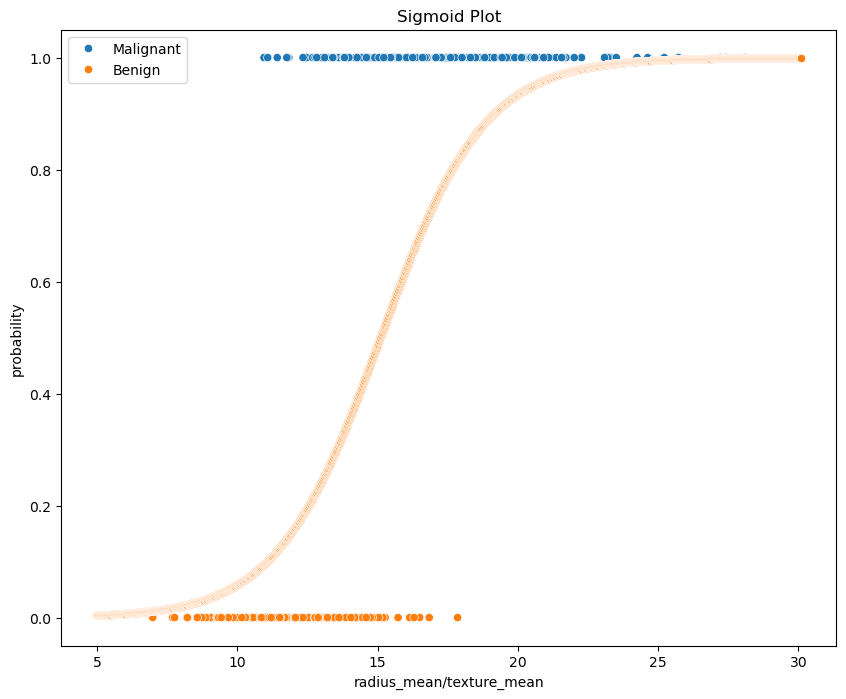

In [23]:
# -- Use DataFrame and Seaborn --

%matplotlib inline

# -- Scatter plot of MEAN RADIUS against DIAGNOSIS --
plt.figure(figsize=(10,8))
sns.scatterplot(x=cancer_df['radius_mean'],
                y=cancer_df['diagnosis'],
                hue=cancer_df['outcome'])

# -- Plot the sigmoid function using the logistic regression model we obtained above --
def sigmoid(x):
    return (1/(1+np.exp(-(log_regress.intercept_[0] +
                         (log_regress.coef_[0][0] * x)))))

x1 = np.arange(cancer_df['radius_mean'].min()-2, cancer_df['radius_mean'].max()+2, 0.01)
y1 = [sigmoid(n) for n in x1]

ax = sns.scatterplot(x=x1,y=y1)
ax.set(xlabel='radius_mean/texture_mean',
       ylabel='probability',
       title='Sigmoid Plot');

#### Prediction 

In [25]:
# -- Make prediction --
# -- What is the diagnosis if one person has a clump the mean radius of which is 20? --
print(log_regress.predict_proba([[20,]]))
print(log_regress.predict([[20,]])[0])

[[0.06510646 0.93489354]]
1


In [26]:
# -- Make prediction --
# -- What is the diagnosis if one person has a clump the mean radius of which is 8? --
print(log_regress.predict_proba([[8,]]))
print(log_regress.predict([[8,]])[0])

[[0.97917589 0.02082411]]
0


In [27]:
# -- Make prediction --
# -- What are the diagnoses of a group of people who have clumps of mean radius 8, 20, 7, 18, and 16? 
log_regress.predict_proba([[8,],[20,],[7,],[18,],[16,]])
log_regress.predict([[8,],[20,],[7,],[18,],[16,]])

array([0, 1, 0, 1, 1])

### Train the Model using Two Features
* We use two columns, mean radius and mean texture, to fit the model

In [29]:
# -- preview the dataset --
cancer_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,1,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,1,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,1,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,1,Malignant


#### Split data into train and testing

In [31]:
# --- Split data into training and testing

from sklearn.model_selection import train_test_split
# -- train_test_split() splits data into two groups: One for training the model and 
# -- the other for testing/validating the model. --

X_train, X_test, y_train, y_test = train_test_split(cancer_df.loc[:,['radius_mean','texture_mean']],
                                                                 cancer_df['diagnosis'],
                                                                 test_size=0.25,
                                                                 random_state = 1,
                                                                 stratify = cancer_df['diagnosis'])
# -- Here, the parameter, test_size = 0.25, means that we want to have 75% of data for fitting the model and 
# -- 25% for testing/validating the model. It is suggested that the training data should be more than 70% of the 
# -- whole dataset. 

X_train.head()

,radius_mean,texture_mean
164,23.27,22.04
28,15.30,25.27
378,13.66,15.15
131,15.46,19.48
233,20.51,27.81


#### Fit the model 

In [33]:
# -- import the Logistic Regression classifier --
from sklearn.linear_model import LogisticRegression

# -- Train the model --
x = X_train            # x = X_train[:,:]
y = y_train
log_regress = LogisticRegression(solver = 'liblinear') # -- instantiate an instance of LogisticRegression()
log_regress.fit(X = x, y = y) # -- Fit the model with the training data X and y. 

# --- Print out intercept and coefficient ---
print(log_regress.intercept_)
print(log_regress.coef_)

[-7.80692697]
[[0.46518188 0.03835158]]


#### Prediction

In [35]:
# --- Test the Model ---
preds_prob = pd.DataFrame(log_regress.predict_proba(X = X_test))

# --- Assign column names to predictions ---
preds_prob.columns = ['Malignant','Benign']
preds_prob.head()

# -- The class (Malignant or Benign) that has probability greater than 0.5 "wins" --
# -- For example, the first row/case has 0.92 of the probability for malignance and 0.083 for benign. 
# -- So, the diagnosis would be malignant.   
# -- What is the verdict of the second case? Third? --

,Malignant,Benign
0,0.675502,0.324498
1,0.688425,0.311575
2,0.002528,0.997472
3,0.831460,0.168540
4,0.948277,0.051723


#### Comparison between predicted diagnosis and actual diagnosis

In [37]:
# --- Get the predicted class labels ---
preds = log_regress.predict(X = X_test)
preds_class = pd.DataFrame(preds)
preds_class.columns = ['Prediction']

# --- Actual diagnosis ---
original_result = pd.DataFrame(y_test.values)
original_result.columns = ['Original Result']

# --- Merge the three dataframes together ---
# -- 0: Malignant 
# -- 1: Benign
result = pd.concat([preds_prob, preds_class, original_result], axis = 1)
result.head()

,Malignant,Benign,Prediction,Original Result
0,0.675502,0.324498,0,0
1,0.688425,0.311575,0,0
2,0.002528,0.997472,1,1
3,0.831460,0.168540,0,0
4,0.948277,0.051723,0,0


### Model Performance Evaluation
#### Confusion Matrix - Training data

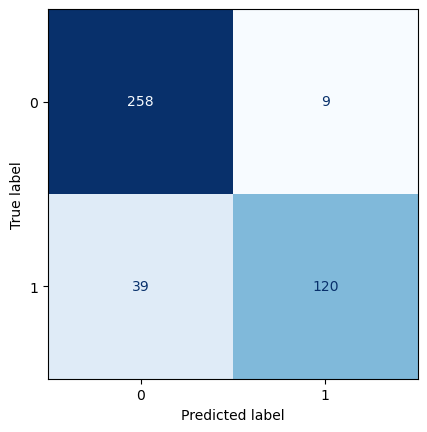

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(log_regress,
                                     X_train,
                                     y_train,
                                     cmap='Blues',
                                     colorbar=False);


#### Confusion Matrix - Testing Data

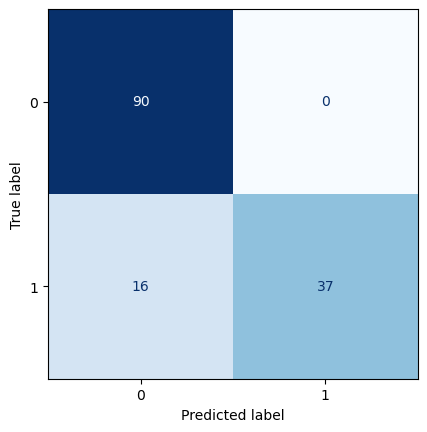

In [41]:
# -- Use ConfusionMatrixDisplay.from_estimator --
from sklearn.metrics import ConfusionMatrixDisplay

preds_test = log_regress.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, 
                                        preds_test,
                                     cmap='Blues',
                                     colorbar=False);

#### Accuracy, Recall, Precision, and Other metrics

In [43]:
# --- Accuracy: num of correct predictions divided by the total of predictions

print('--- Accuracy ---')
print(log_regress.score(X = X_test, y = y_test))

--- Accuracy ---
0.8881118881118881


In [44]:
# View summary of common classification metrics
from sklearn import metrics
print('--- Metrices ---')
print(metrics.classification_report(y_true = y_test, y_pred = preds))

--- Metrices ---
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        90
           1       1.00      0.70      0.82        53

    accuracy                           0.89       143
   macro avg       0.92      0.85      0.87       143
weighted avg       0.91      0.89      0.88       143



In [45]:
print(metrics.f1_score(y_test,preds))

0.8222222222222222


#### Receiver Operating Characteristic (ROC) Curve
**Note:** 
* The ROC curve is created by plotting the TPR against the FPR at various thrshold settings. 
* Threshold of 0.5: all of those predicted probabilities less than or equal to 0.5 belong to one class, while those greater than 0.5 belong to another class.

In [47]:
# --- find the prediction probabilities using the test set ---
from sklearn.metrics import roc_curve, auc
probs = log_regress.predict_proba(X_test)
preds = probs[:,1]

# --- find the FPR, TPR and threshold ---
fpr, tpr, threshold = roc_curve(y_test, preds)
print(fpr)
print(tpr)
print(threshold)

[0.         0.         0.         0.01111111 0.01111111 0.02222222
 0.02222222 0.05555556 0.05555556 0.12222222 0.12222222 0.13333333
 0.13333333 0.15555556 0.15555556 0.16666667 0.16666667 0.26666667
 0.26666667 0.56666667 0.56666667 0.76666667 0.76666667 1.        ]
[0.         0.01886792 0.73584906 0.73584906 0.75471698 0.75471698
 0.77358491 0.77358491 0.83018868 0.83018868 0.86792453 0.86792453
 0.88679245 0.88679245 0.90566038 0.90566038 0.9245283  0.9245283
 0.94339623 0.94339623 0.96226415 0.96226415 1.         1.        ]
[       inf 0.99747173 0.48136486 0.4706988  0.46952202 0.4668988
 0.46602968 0.43906778 0.42424963 0.38569275 0.3474153  0.34431106
 0.34094327 0.33089779 0.32579729 0.32449834 0.31392225 0.26437584
 0.26183377 0.17262948 0.17051256 0.13182348 0.12668955 0.03955444]


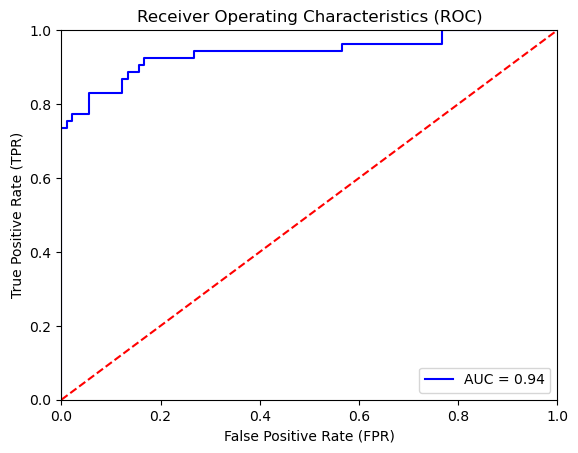

In [48]:
# --- Plot the ROC and Find AUC ---

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,'b',label = 'AUC = %0.2F' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristics (ROC)')
plt.legend(loc = 'lower right')
plt.show()